# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    base_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(base_url)
        city_response = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response["coord"]["lat"]
        city_lng = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_clouds = city_response["clouds"]["all"]
        city_wind = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinop
Processing Record 2 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | manta
Processing Record 13 of Set 1 | kamina
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | guarapari
Processing Record 17 of Set 1 | nizhnevartovsk
Processing Record 18 of Set 1 | alotau
City not found. Skipping...
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | sharlyk
Processing Record 21 of Set 1 | h

Processing Record 39 of Set 4 | kuta
Processing Record 40 of Set 4 | jamestown
Processing Record 41 of Set 4 | badger
Processing Record 42 of Set 4 | saint-pierre
Processing Record 43 of Set 4 | buka
Processing Record 44 of Set 4 | port-vila
Processing Record 45 of Set 4 | johnstown
Processing Record 46 of Set 4 | port augusta
Processing Record 47 of Set 4 | suileng
Processing Record 48 of Set 4 | hwange
Processing Record 49 of Set 4 | remire-montjoly
Processing Record 0 of Set 5 | kayangel
Processing Record 1 of Set 5 | mineros
Processing Record 2 of Set 5 | colonia
Processing Record 3 of Set 5 | tahe
Processing Record 4 of Set 5 | wailua homesteads
Processing Record 5 of Set 5 | laojunmiao
Processing Record 6 of Set 5 | camacupa
Processing Record 7 of Set 5 | aflou
Processing Record 8 of Set 5 | invercargill
Processing Record 9 of Set 5 | maridi
Processing Record 10 of Set 5 | tiksi
Processing Record 11 of Set 5 | sandnessjoen
Processing Record 12 of Set 5 | alenquer
Processing Recor

Processing Record 31 of Set 8 | andijon
Processing Record 32 of Set 8 | ryotsu-minato
Processing Record 33 of Set 8 | labrador city
Processing Record 34 of Set 8 | den burg
Processing Record 35 of Set 8 | huarmey
Processing Record 36 of Set 8 | kerikeri
Processing Record 37 of Set 8 | kem'
Processing Record 38 of Set 8 | kavaratti
Processing Record 39 of Set 8 | capao da canoa
Processing Record 40 of Set 8 | taunggyi
Processing Record 41 of Set 8 | yylanly
City not found. Skipping...
Processing Record 42 of Set 8 | kukawa
Processing Record 43 of Set 8 | williams lake
Processing Record 44 of Set 8 | susuman
Processing Record 45 of Set 8 | chebba
Processing Record 46 of Set 8 | happy valley-goose bay
Processing Record 47 of Set 8 | pakuranga
Processing Record 48 of Set 8 | lerwick
Processing Record 49 of Set 8 | urangan
Processing Record 0 of Set 9 | east london
Processing Record 1 of Set 9 | magadan
Processing Record 2 of Set 9 | dunedin
Processing Record 3 of Set 9 | enewetak
Processin

Processing Record 21 of Set 12 | natal
Processing Record 22 of Set 12 | polovinnoye
Processing Record 23 of Set 12 | riachao das neves
Processing Record 24 of Set 12 | panama city beach
Processing Record 25 of Set 12 | hozat
-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinop,41.7711,34.8709,16.71,82,0,1.47,TR,1690852129
1,waitangi,-43.9535,-176.5597,13.79,87,1,2.68,NZ,1690851974
2,mount isa,-20.7333,139.5000,23.87,35,100,4.12,AU,1690852131
3,puerto ayora,-0.7393,-90.3518,24.75,93,57,1.79,EC,1690852132
4,port-aux-francais,-49.3500,70.2167,5.18,93,100,18.76,TF,1690852133


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinop,41.7711,34.8709,16.71,82,0,1.47,TR,1690852129
1,waitangi,-43.9535,-176.5597,13.79,87,1,2.68,NZ,1690851974
2,mount isa,-20.7333,139.5000,23.87,35,100,4.12,AU,1690852131
3,puerto ayora,-0.7393,-90.3518,24.75,93,57,1.79,EC,1690852132
4,port-aux-francais,-49.3500,70.2167,5.18,93,100,18.76,TF,1690852133


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

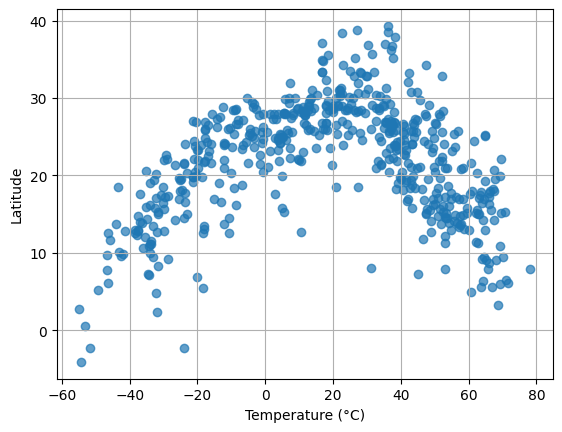

In [16]:
# Build scatter plot for latitude vs. temperature
latitute_data = city_data_df["Lat"]
temperature_data = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(latitute_data, temperature_data, marker="o", alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

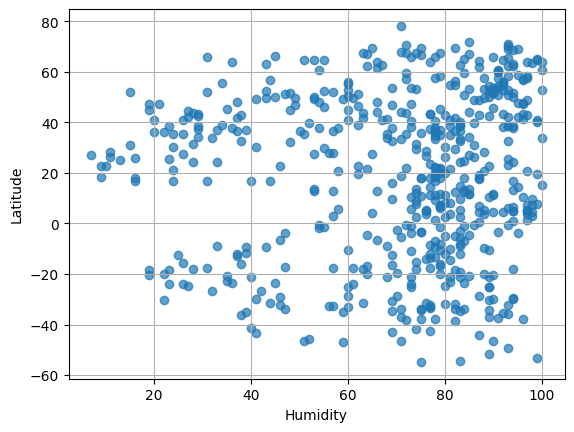

In [17]:
# Build the scatter plots for latitude vs. humidity
latitute_data = city_data_df["Lat"]
humidity_data = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(humidity_data, latitute_data, marker="o", alpha=0.7)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

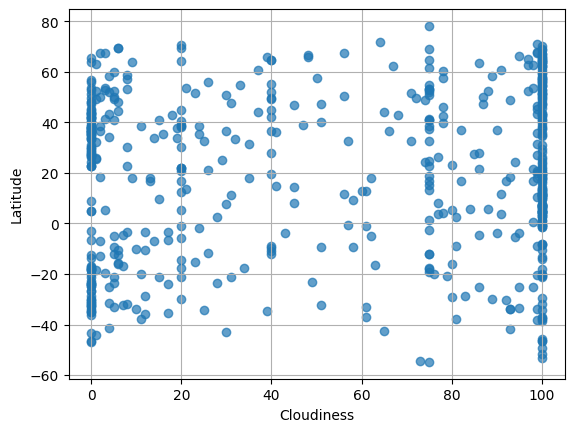

In [18]:
# Build the scatter plots for latitude vs. cloudiness
latitute_data = city_data_df["Lat"]
cloudiness_data = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(cloudiness_data, latitute_data, marker="o", alpha=0.7)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

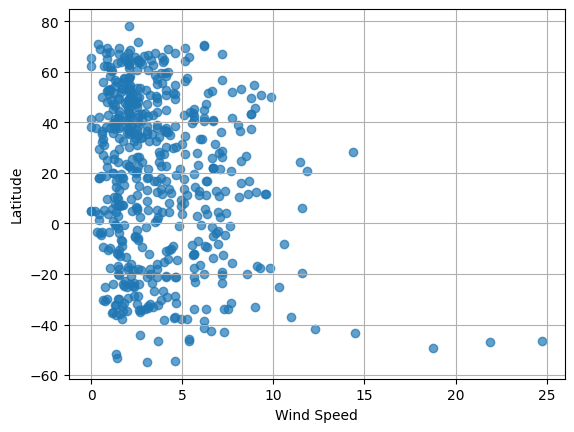

In [19]:
# Build the scatter plots for latitude vs. wind speed
latitute_data = city_data_df["Lat"]
wind_data = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(wind_data, latitute_data, marker="o", alpha=0.7)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# # Define a function to create Linear Regression plots
# def plot_linear_regression(x_values, y_values, x_label, y_label, title, hemisphere):
#     # Perform linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#     # Calculate the regression line
#     regression_line = slope * x_values + intercept

#     # Create scatter plot
#     plt.scatter(x_values, y_values, marker="o", alpha=0.7)

#     # Plot the regression line
#     plt.plot(x_values, regression_line, "r-")

#     # Add labels and title
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.title(title)

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinop,41.7711,34.8709,16.71,82,0,1.47,TR,1690852129
7,ilulissat,69.2167,-51.1000,6.01,93,75,0.51,GL,1690852134
8,bethel,41.3712,-73.4140,22.64,68,75,0.00,US,1690852135
12,utrik,11.2278,169.8474,28.39,77,100,6.29,MH,1690852137
13,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,100,100,3.00,RU,1690852132


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,13.79,87,1,2.68,NZ,1690851974
2,mount isa,-20.7333,139.5000,23.87,35,100,4.12,AU,1690852131
3,puerto ayora,-0.7393,-90.3518,24.75,93,57,1.79,EC,1690852132
4,port-aux-francais,-49.3500,70.2167,5.18,93,100,18.76,TF,1690852133
5,ushuaia,-54.8000,-68.3000,2.81,75,75,3.09,AR,1690851966


###  Temperature vs. Latitude Linear Regression Plot

the r-squared is: 0.36909913963050356


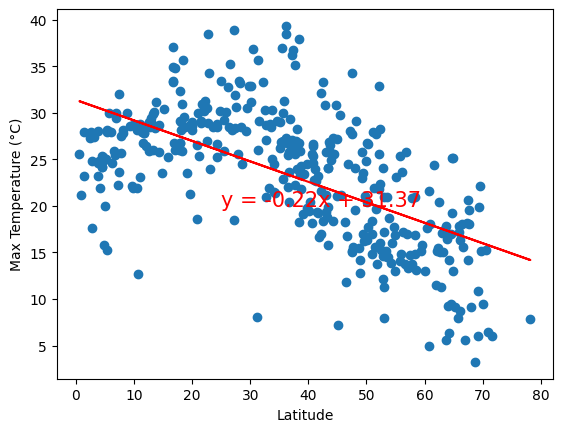

In [22]:
# Linear regression on Northern Hemisphere

# Perform linear regression
x_values = northern_hemi_df["Lat"].values
y_values = northern_hemi_df["Max Temp"].values
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the scatter plot & regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (25, 20), fontsize=15, color="red")
print(f"the r-squared is: {r_value**2}")

# Set the title and labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.show()

the r-squared is: 0.5803382861781475


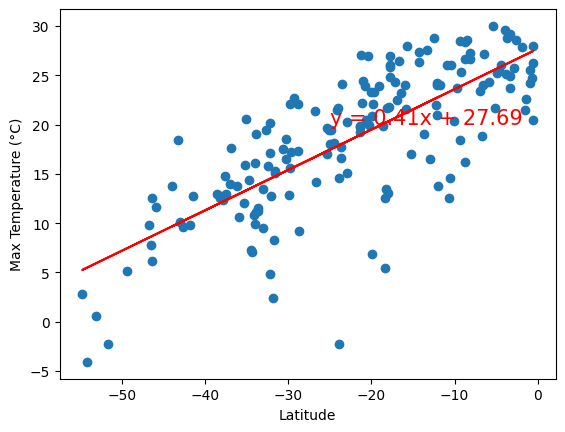

In [25]:
# Linear regression on Southern Hemisphere

# Perform linear regression
x_values = southern_hemi_df["Lat"].values
y_values = southern_hemi_df["Max Temp"].values
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the scatter plot & regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25, 20), fontsize=15, color="red")
print(f"the r-squared is: {r_value**2}")

# Set the title and labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.show()

**Discussion about the linear relationship:** These values indicate that temperature and latitude have a moderate linear relationship, and the linear regression models explain a notable portion of the variation in temperature based on latitude. The moderate R-squared values for both hemispheres suggest that latitude is a meaningful predictor of temperature. However, it's essential to remember that temperature is influenced by a combination of factors, not just latitude.

### Humidity vs. Latitude Linear Regression Plot

the r-squared is: 0.00015494676179545868


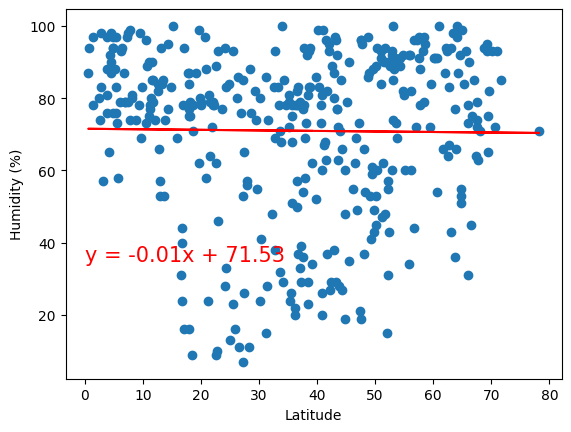

In [29]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].values
y_values = northern_hemi_df["Humidity"].values
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the scatter plot & regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, 35), fontsize=15, color="red")
print(f"the r-squared is: {r_value**2}")

# Set the title and labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

the r-squared is: 0.0024399725673984016


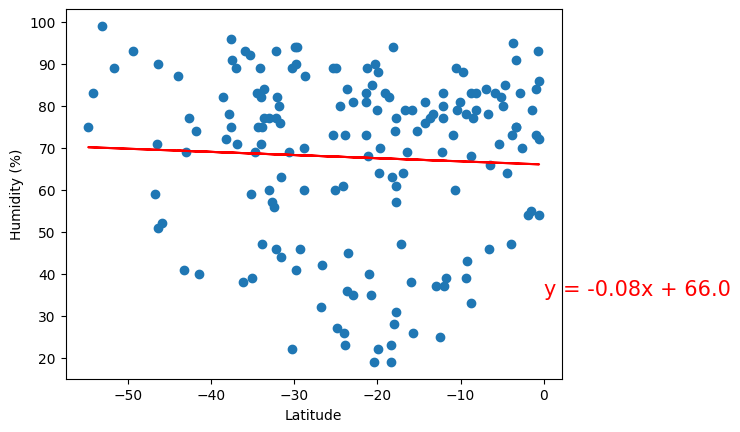

In [30]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]

# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].values
y_values = southern_hemi_df["Humidity"].values
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the scatter plot & regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, 35), fontsize=15, color="red")
print(f"the r-squared is: {r_value**2}")

# Set the title and labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** The low R-squared values indicate that latitude alone is not sufficient to predict humidity levels in both hemispheres. In other words, the variation in humidity explained by latitude in these regions is extremely low, and the linear relationship is weak or practically nonexistent.

### Cloudiness vs. Latitude Linear Regression Plot

the r-squared is: 0.014441458097248342


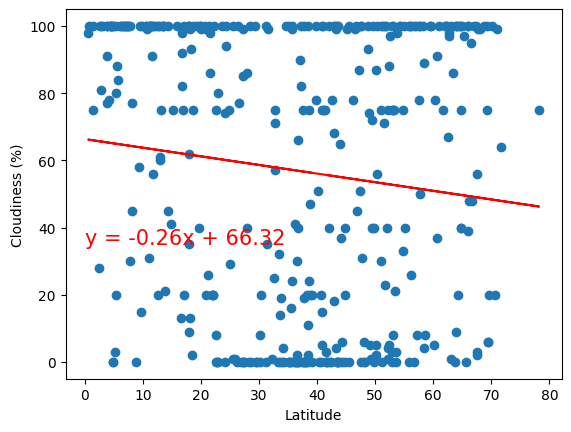

In [33]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].values
y_values = northern_hemi_df["Cloudiness"].values
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the scatter plot & regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, 35), fontsize=15, color="red")
print(f"the r-squared is: {r_value**2}")

# Set the title and labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

the r-squared is: 0.001092451734625586


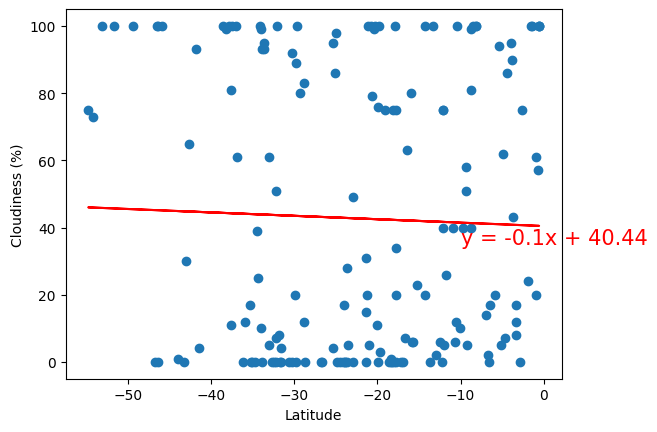

In [35]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]

# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].values
y_values = southern_hemi_df["Cloudiness"].values
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the scatter plot & regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-10, 35), fontsize=15, color="red")
print(f"the r-squared is: {r_value**2}")

# Set the title and labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** Cloudiness is a complex meteorological variable influenced by multiple dynamic atmospheric and geographic factors. Other factors like proximity to oceans, wind patterns, temperature gradients, and atmospheric conditions are essential in determining cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

the r-squared is: 0.02224374612011439


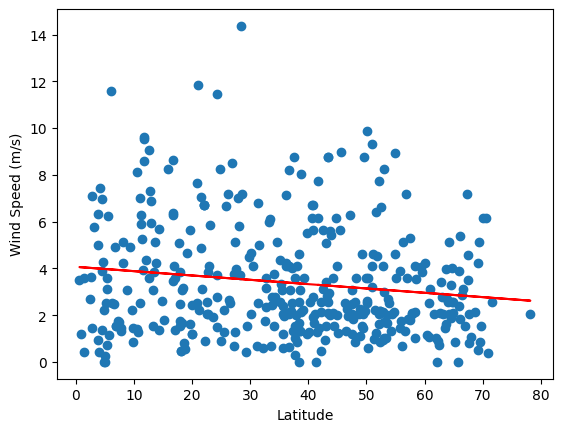

In [42]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].values
y_values = northern_hemi_df["Wind Speed"].values
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the scatter plot & regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, 30), fontsize=15, color="red")
print(f"the r-squared is: {r_value**2}")

# Set the title and labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

the r-squared is: 0.04970865651846338


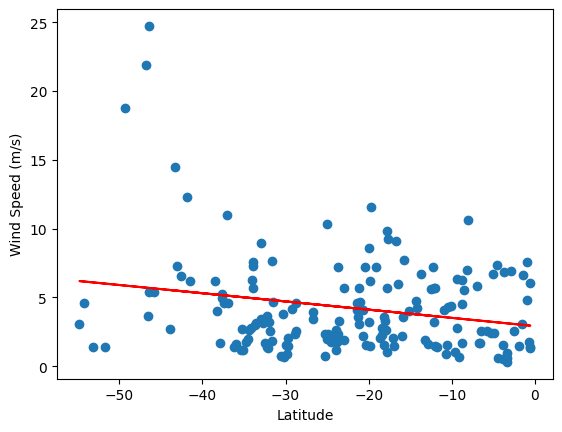

In [45]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]

# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].values
y_values = southern_hemi_df["Wind Speed"].values
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the scatter plot & regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-10, 50), fontsize=15, color="red")
print(f"the r-squared is: {r_value**2}")

# Set the title and labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** Wind patterns are influenced by numerous factors, such as pressure systems, temperature gradients, topography, and proximity to water bodies, which are not fully captured by the simple linear regression model with latitude as the independent variable so there is a weak linear relationship between wind speed and latitude.